## Lab5 Practical - SelfPractices

# K-means

In [2]:
# K-Means Clustering
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [3]:
#Load the iris clusters
datasets = load_iris()

#Fit a kMeans model to the data
model = KMeans(n_clusters=3)
model.fit(datasets.data)
print(model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


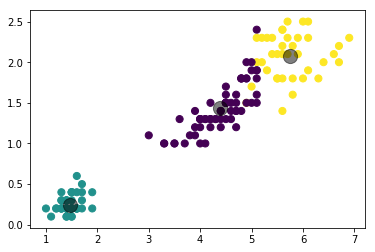

In [6]:
#Visualise the results
import matplotlib.pyplot as plt
X = datasets.data
y_kmeans = model.predict(X)

#scatter plot the petal length (column2), petal width (column3)
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis')

#show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)

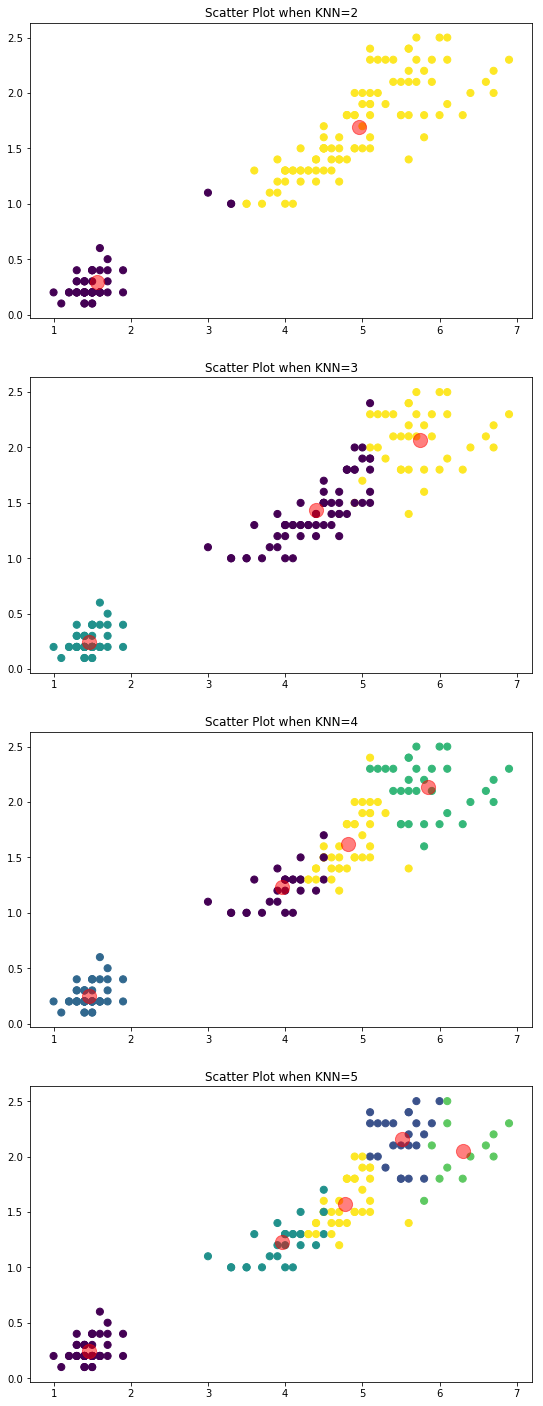

In [37]:
fig, axs = plt.subplots(4, figsize=(9,25))
#fig.suptitle('Sub Plot figures:: KMeans Ranging from 2 to 5')

i=0
for knn in range(2, 6):    
    #doing multiple plots showing the effect of different values of k range 2 to 5.
    knn_model = KMeans(knn, random_state=0)
    labels = knn_model.fit_predict(X)
    
    axs[i].set_title('Scatter Plot when KNN='+str(knn))
    axs[i].scatter(X[:, 2], X[:, 3], c=labels, s=50, cmap='viridis')
    
    #show centroid centres as grey circle opacity 50%
    centers = knn_model.cluster_centers_
    axs[i].scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.5)
    i+=1


# Clustering Silhouette_score

In [40]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [41]:
X = load_iris().data

In [42]:
distortions = []
K = range(2, 11)
for n_cluster in K:
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    
    distortions.append(kmeans.inertia_)

For n_clusters=2, The Silhouette Coefficient is 0.681046169211746
For n_clusters=3, The Silhouette Coefficient is 0.5528190123564091
For n_clusters=4, The Silhouette Coefficient is 0.49745518901737446
For n_clusters=5, The Silhouette Coefficient is 0.4887488870931048
For n_clusters=6, The Silhouette Coefficient is 0.3557536089245223
For n_clusters=7, The Silhouette Coefficient is 0.3544141502571741
For n_clusters=8, The Silhouette Coefficient is 0.3477684961693679
For n_clusters=9, The Silhouette Coefficient is 0.3323889530130657
For n_clusters=10, The Silhouette Coefficient is 0.31689682620208404


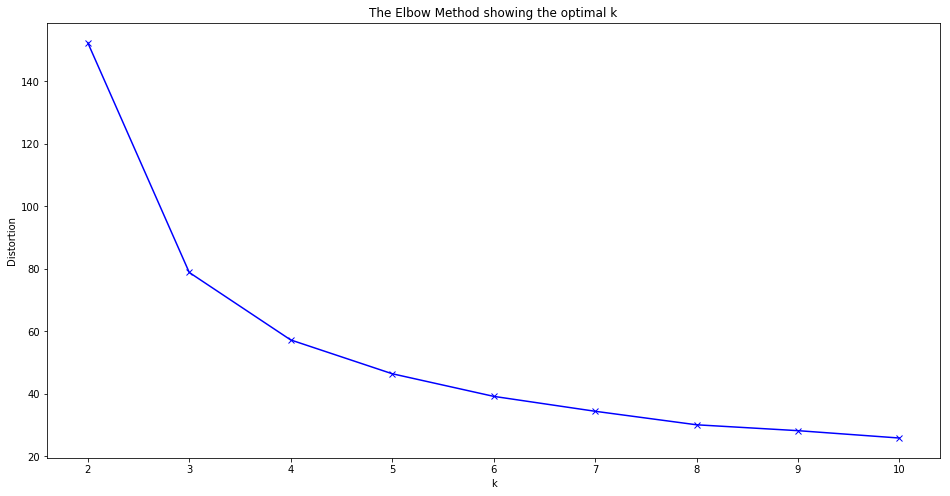

In [43]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Anomaly Detection using K-Means

In [15]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.cluster import KMeans

In [16]:
#generate the data
X, label = make_blobs(100, centers = 1)

#get_the k means models
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)
print(kmeans)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


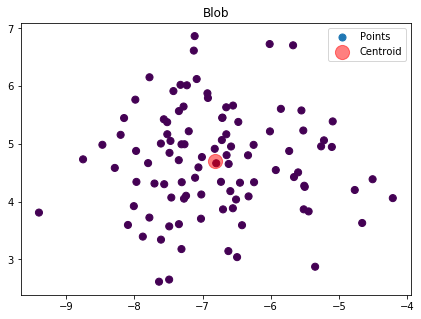

In [20]:
#Visualize the results
import matplotlib.pyplot as plt

y_kmeans = kmeans.predict(X)

#scatter plot the data points
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Blob')
ax.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis', label='Points')

# show centroid centres as red circle opacity 50%
centers = kmeans.cluster_centers_
ax.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5, label='Centroid')

ax.legend()
plt.show()

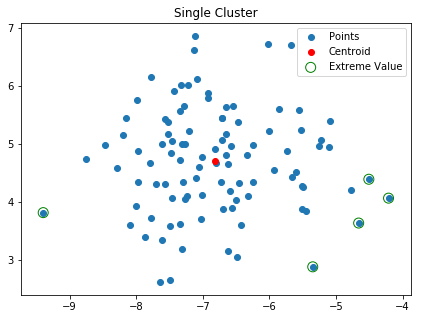

[[-9.39661804  3.81116833]
 [-4.21168177  4.06174115]
 [-4.6604097   3.6308943 ]
 [-5.34986248  2.8736199 ]
 [-4.50757673  4.38863304]]


In [23]:
# identify the 5 closest points
# argsort returns an array of indexes which will sort the array in ascending order
# so we reverse it via [::-1] and take the top five with [:5]
distances = kmeans.transform(X)
sorted_idx = np.argsort(distances.ravel())[::-1][:5]
# Now let's see which are the top 5 points furthest away
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Single Cluster")
ax.scatter(X[:, 0], X[:,1], label='Points')

centers = kmeans.cluster_centers_
ax.scatter(centers[:,0], 
           centers[:,1],
           label='Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0], X[sorted_idx][:,1], 
          label='Extreme Value', edgecolors='g',
          facecolors='none', s=100)
ax.legend(loc='best')
plt.show()

#It's easy to remove these points if we like: 
new_X = np.delete(X, sorted_idx, axis=0)

#Or to extract the anomalies
anomaly_X = X[sorted_idx, :]
print(anomaly_X)